## Clustering Riepilogo


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/centroid.gif" width="600">



In [7]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

%matplotlib inline
mpl.rcParams["figure.figsize"] = (14,10)

### Load the Data

For `KElbowVisualizer` and `SilhouetteVisualzer` examples, we'll use scikit-learn's `make_blobs()` function to create a sample two-dimensional dataset with 8 random clusters of points.

In [4]:
# Generate synthetic dataset with 8 blobs
X, y = make_blobs(n_samples=1000, 
                  n_features=15, 
                  centers=8, 
                  random_state=668
                  )

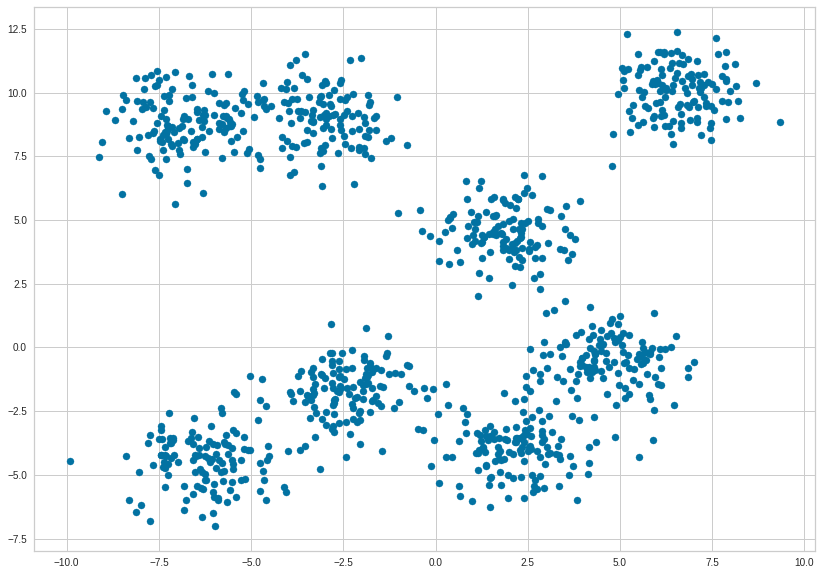

In [5]:
plt.figure(figsize=(14,10))
plt.scatter(X[:, 0], X[:, 1], s=50);

## Elbow Method 

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.


K-Means is a simple unsupervised machine learning algorithm that groups data into the number $K$ of clusters specified by the user, even if it is not the optimal number of clusters for the dataset. 

Yellowbrick's `KElbowVisualizer` implements the “elbow” method of selecting the optimal number of clusters by fitting the K-Means model with a range of values for $K$. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

In the following example, the `KElbowVisualizer` fits the model for a range of $K$ values from 4 to 11, which is set by the parameter `k=(4,12)`. When the model is fit with 8 clusters we can see an "elbow" in the graph, which in this case we know to be the optimal number since we created our synthetic dataset with 8 clusters of points. 

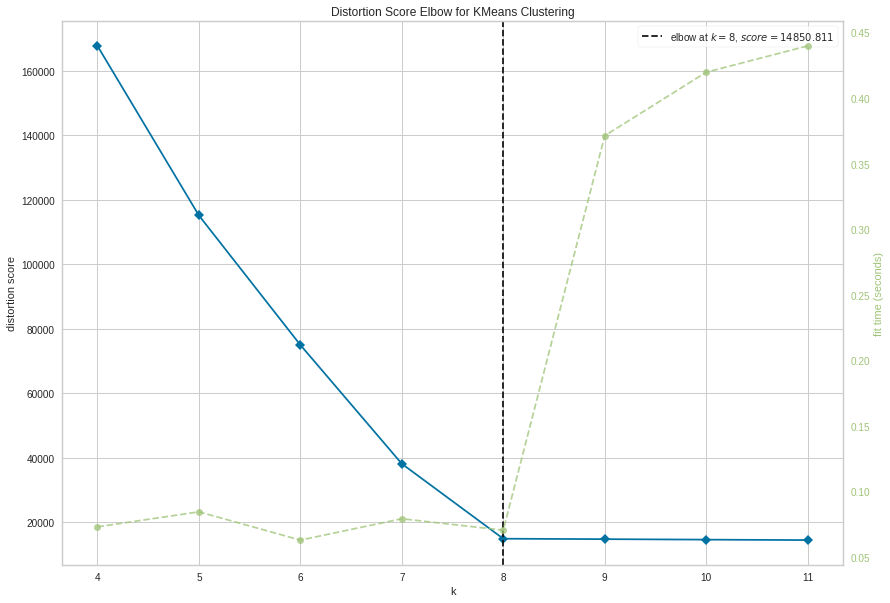

In [8]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

result = visualizer.fit(X)    # Fit the data to the visualizer
result.show()

By default, the scoring parameter `metric` is set to `distortion`, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the `KElbowVisualizer`&mdash;`silhouette` and `calinski_harabasz`. The `silhouette` score is the mean silhouette coefficient for all samples, while the `calinski_harabasz` score computes the ratio of dispersion between and within clusters.
 
The `KElbowVisualizer` also displays the amount of time to fit the model per $K$, which can be hidden by setting `timings=False`. In the following example, we'll use the `calinski_harabasz` score and hide the time to fit the model.

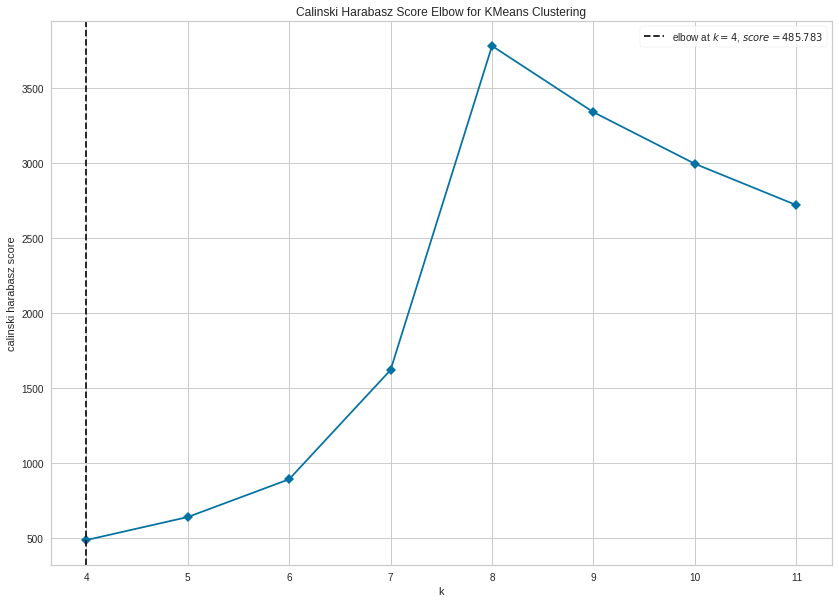

In [9]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='calinski_harabasz', timings=False)

result = visualizer.fit(X)    # Fit the data to the visualizer
result.show();   # Finalize and render the figure

It is important to remember that the Elbow method does not work well if the data is not very clustered. In this case, you might see a smooth curve and the optimal value of $K$ will be unclear.

You can learn more about the Elbow method at Robert Grove's [Blocks](https://bl.ocks.org/rpgove/0060ff3b656618e9136b).

## Silhouette Visualizer 

Silhouette si riferisce a un metodo di interpretazione e convalida della coerenza all'interno di gruppi di dati . La tecnica fornisce una succinta rappresentazione grafica di come ogni oggetto è stato classificato. [1]

Il valore della silhouette è una misura di quanto un oggetto è simile al proprio cluster (coesione) rispetto ad altri cluster (separazione). La silhouette varia da -1 a +1, dove un valore alto indica che l'oggetto è ben abbinato al proprio cluster e scarsamente abbinato ai cluster vicini. Se la maggior parte degli oggetti ha un valore elevato, la configurazione del cluster è appropriata. Se molti punti hanno un valore basso o negativo, la configurazione del cluster potrebbe avere troppi o troppo pochi cluster.

La silhouette può essere calcolata con qualsiasi metrica di distanza , come la distanza euclidea o la distanza di Manhattan .

Since we created the sample dataset for these examples, we already know that the data points are grouped into 8 clusters. So for the first `SilhouetteVisualizer` example, we'll set $K$ to 8 in order to show how the plot looks when using the optimal value of $K$. 

Notice that graph contains homogeneous and long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcf4496a90>,
                     estimator=KMeans())

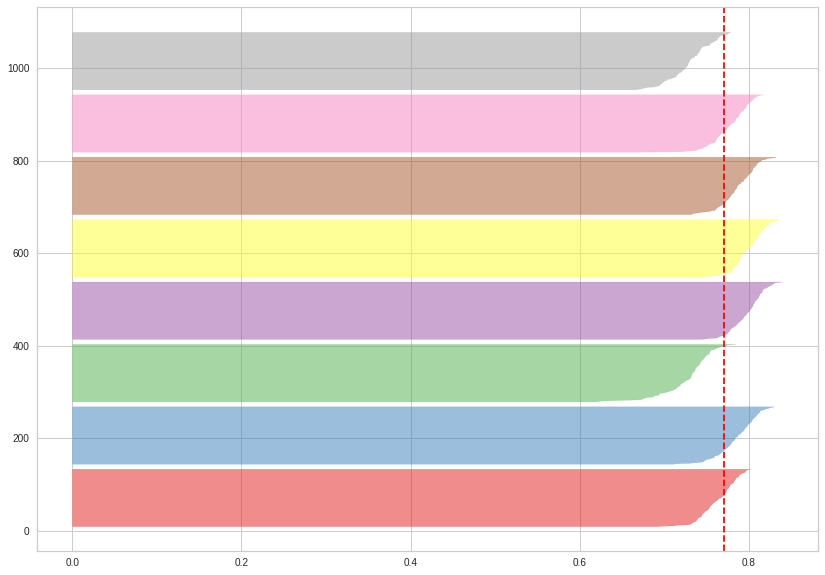

In [10]:
# Instantiate the clustering model and visualizer 
model = KMeans(8)
visualizer = SilhouetteVisualizer(model)

plot = visualizer.fit(X)    # Fit the data to the visualizer
plot   # Finalize and render the figure

For the next example, let's see what happens when using a non-optimal value for $K$, in this case, 6. 

Now we see that the width of clusters 1 and 2 have both increased and their silhouette coefficient scores have dropped. This occurs because the width of each silhouette is proportional to the number of samples assigned to the cluster. The model is trying to fit our data into a smaller than optimal number of clusters, making two of the clusters larger (wider) but much less cohesive (as we can see from their below-average scores).

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd8e442d90>,
                     estimator=KMeans(n_clusters=6))

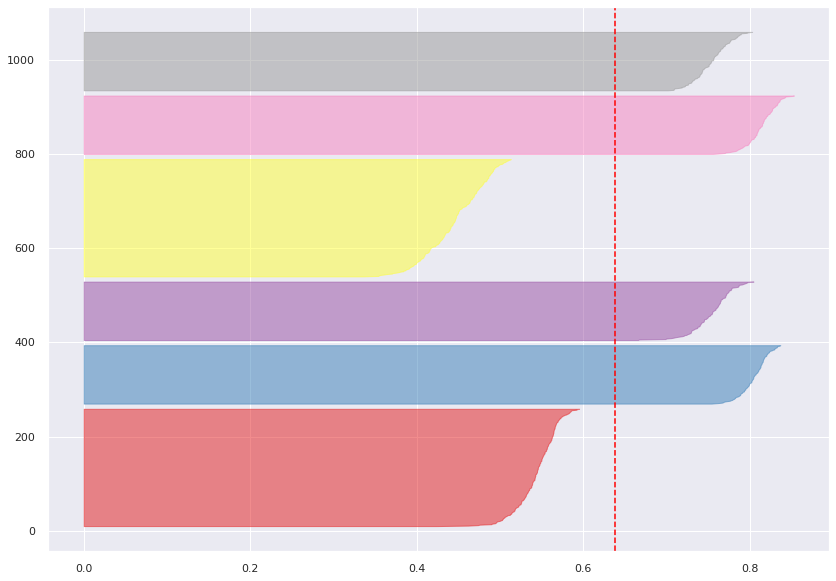

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)

plot = visualizer.fit(X)    # Fit the data to the visualizer
plot   # Finalize and render the figure

## Creare un dendrogramma con scipy
Possiamo utilizzare scipy per eseguire il clustering gerarchico agglomerativo di un dataset, in questo modo otterremo un **dendrogramma** che conterrà tutti i possibili cluster.
<br><br>
Per farlo utilizziamo le seguenti funzioni:
* **<span style="font-family: Monaco">linkage</span>**: per eseguire il clustering gerarchico
* **<span style="font-family: Monaco">dendrogram</span>**: per costruire il dendrogramma

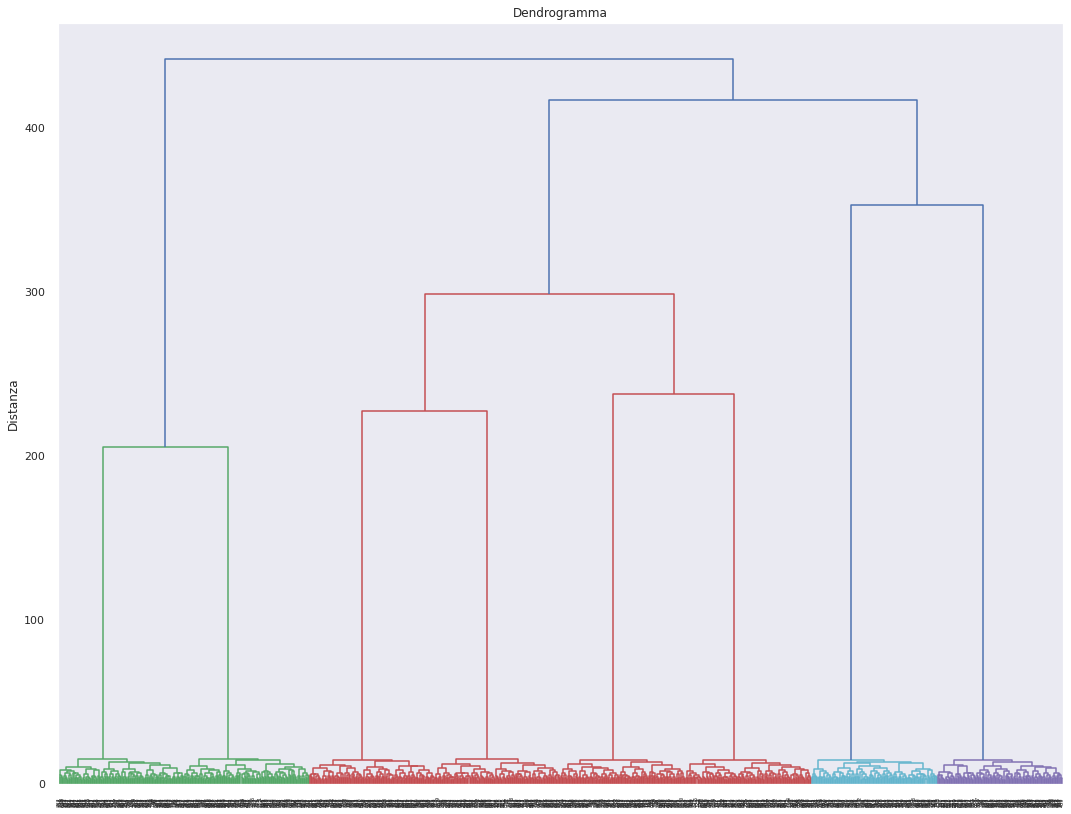

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(18,14))
dendogram = dendrogram(linkage(X, method="ward"));
plt.ylabel("Distanza");
plt.grid(False);
plt.title("Dendrogramma");

Ecco il nostro dendrogramma.
<br><br>
Possiamo osservare che i clusters rappresentati dalle linee blu sono stati formati dall'unione di clusters che hanno una distanza notevolmente maggiore rispetto a quelli sottostanti, quindi se volessimo tagliare il dendrogramma possiamo posizionare la nostra soglia

### Agglomerative Clustering

"Agglomerative Clustering" applica il metodo "top-down" o "bottom-up" per il clustering dei dati di osservazione. Agglomerative è un metodo di clustering gerarchico che applica l'approccio "dal basso verso l'alto" per raggruppare gli elementi in un set di dati. In questo metodo, ogni elemento avvia il proprio cluster e si fonde progressivamente con altri cluster secondo determinati criteri.


Scikit-learn fornisce la classe AgglomerativeClustering per implementare il metodo di clustering agglomerato.  

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=8)
y = hc.fit_predict(X)

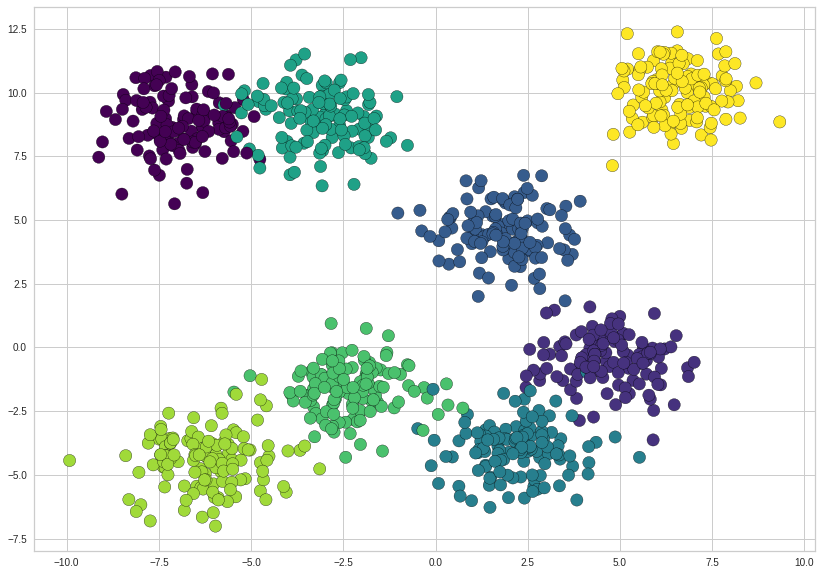

In [12]:
plt.figure(figsize=(14,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='viridis', edgecolors="black");

# Intercluster Distance Maps

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved, e.g. the closer two centers are in the visualization, the closer they are in the original feature space.

The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd8e4e3e90>,
                     estimator=KMeans(n_clusters=6))

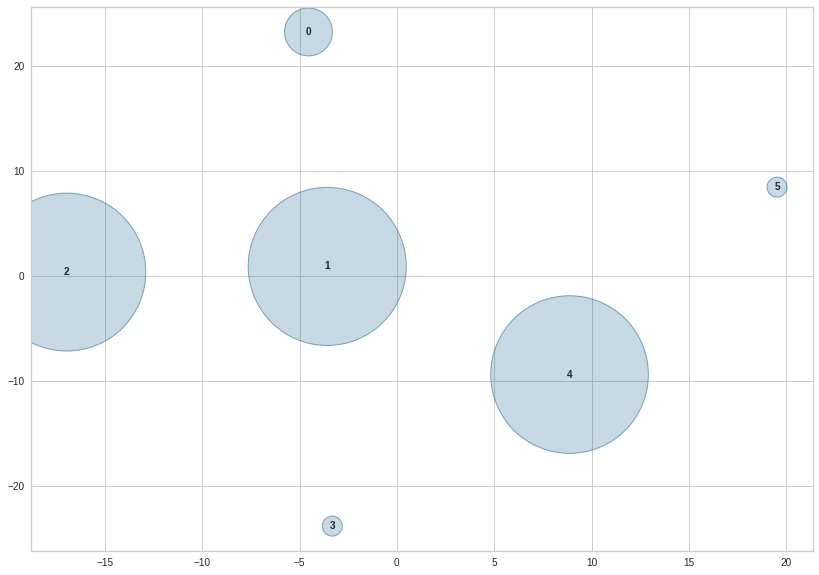

In [ ]:
# Generate synthetic dataset with 12 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans(6)
visualizer = InterclusterDistance(model)

plot = visualizer.fit(X)        # Fit the data to the visualizer
plot       # Finalize and render the figure

## DBSCAN

Il DBSCAN (*Density-based spatial clustering of applications with noise*) è un algoritmo di clustering che offre alcuni vantaggi rispetto al K-means e al Clustering Gerarchico:
1. Non serve definire il numero di cluster
2. E' molto resistente agli outliers
3. Crea clusters non solo di forma sferica
<br>

Per utilizzare il DBSCAN bisogna definire il valore di due nuovi parametri:

1. **Eps**: la distanza massima tra due osservazioni appartenenti ad uno stesso cluster
2. **minPts**: il numero minimo di osservazioni richieste per formare un cluster

In questo notebook vedremo un esempio di clustering in cui il DBSCAN perfoma notevolmente meglio di K-means e Clustering Gerarchico Agglomerativo.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

plt.rcParams["figure.figsize"] = (14, 10)
sns.set()

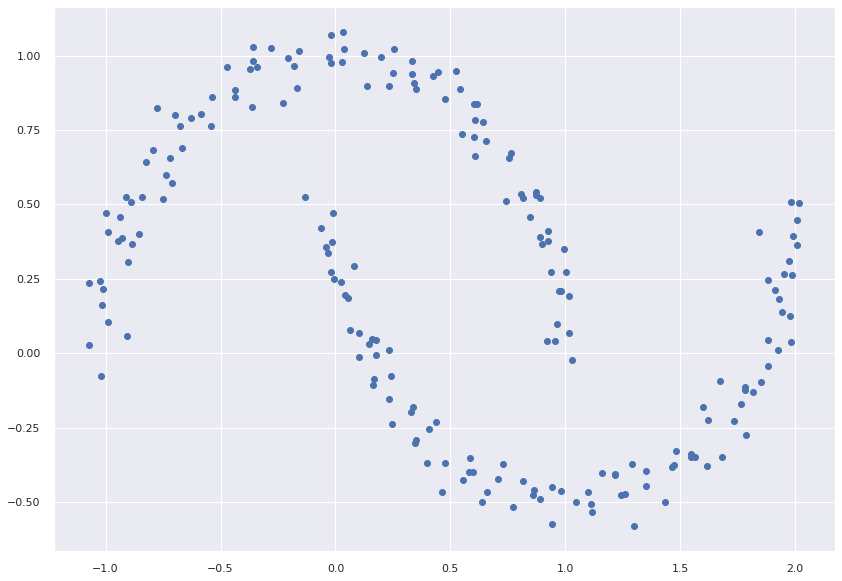

In [14]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0],X[:,1]);

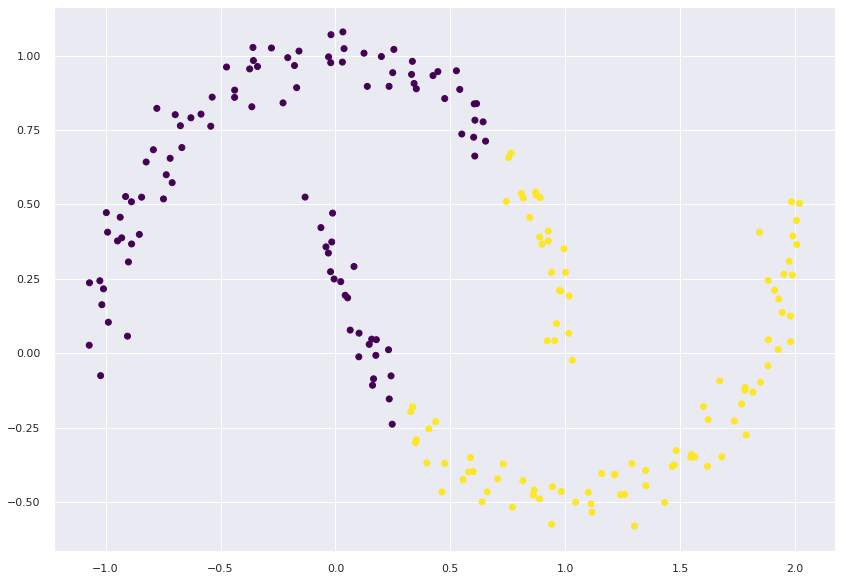

In [15]:
##With K-Means
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)
y_km = km.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_km,cmap='viridis');

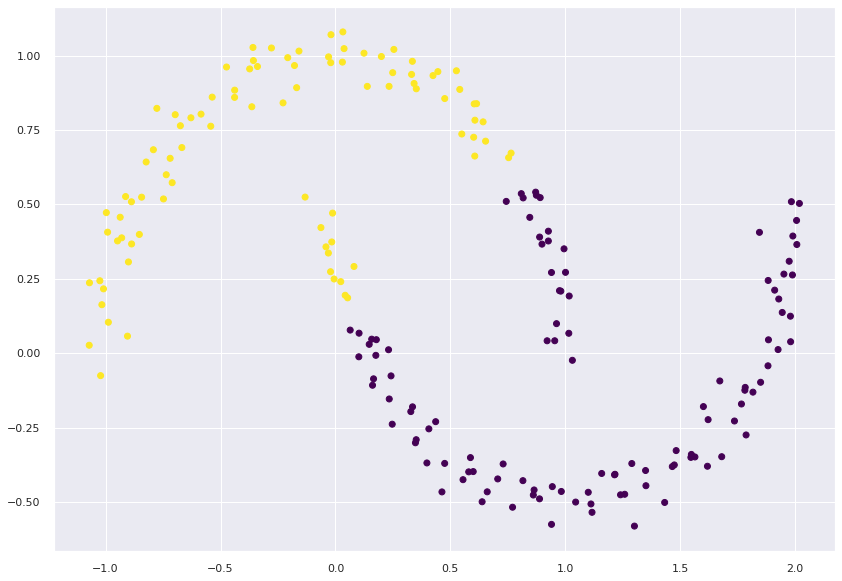

In [17]:
# With Clustering Gerarchico Agglomerativo
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, linkage="complete")
y_ac = ac.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_ac,cmap='viridis');

## DBSCAN
Adesso proviamo con il DBSCAN, come già precisato qui non serve specificare il numero di clusters, ma dobbiamo definire i valori di **eps** e **minPts**.

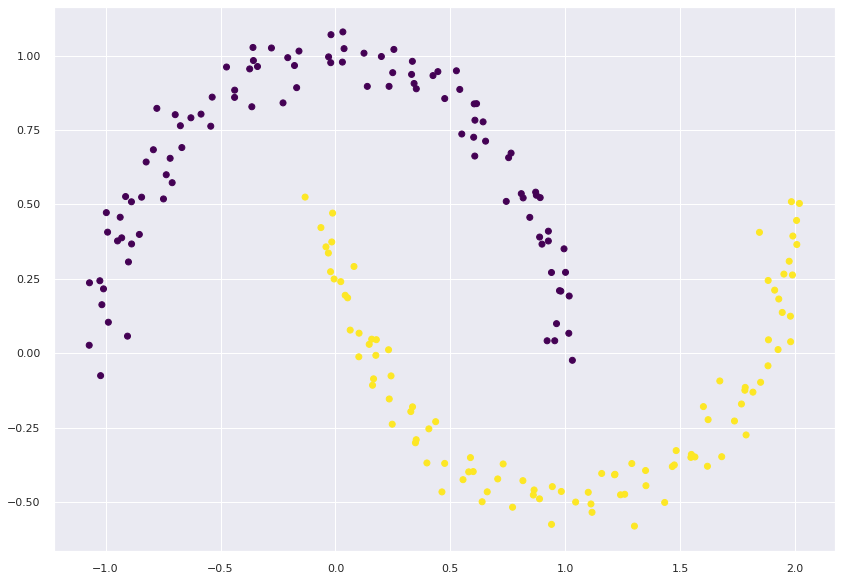

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan,cmap='viridis');
#core_pts = dbscan.components_
#plt.scatter(x=core_pts[:, 0], y=core_pts[:, 1], c='red', s=200, alpha=0.5);

Il principale problema del DBSCAN è che bisogna ottimizzare i valori di **eps** e **minPts** e questo è particolarmente difficile specialmente in casi in cui la densità dei clusters è notevolmente diversa, cioè quando la differenza del numero di osservazioni per cluster è elevata.